In [1]:
import torch
from torch import nn
from torchvision import transforms
import torchvision
from torch.utils import data
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
# solvely path : D:\DATA\IMG\ins\___solvely___  0
# chuu__chloe path : D:\DATA\IMG\ins\chuu__chloe  1
# delight_hyeon path : D:\DATA\IMG\ins\delight_hyeon  2
dic = {}
path = r'D:\DATA\IMG\ins'
cls = ['___solvely___', 'chuu__chloe', 'delight_hyeon']
for i in range(len(cls)):
    lis = os.listdir(os.path.join(path, cls[i]))
    lis = list(filter(lambda x:x.split('.')[-1] == 'jpg', lis))
    lis = [os.path.join(path, cls[i], _) for _ in lis]
    dic.update({i: lis})
dic.keys()

dict_keys([0, 1, 2])

In [3]:
train_rate = 0.75
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
img00 = Image.open(dic[0][0])

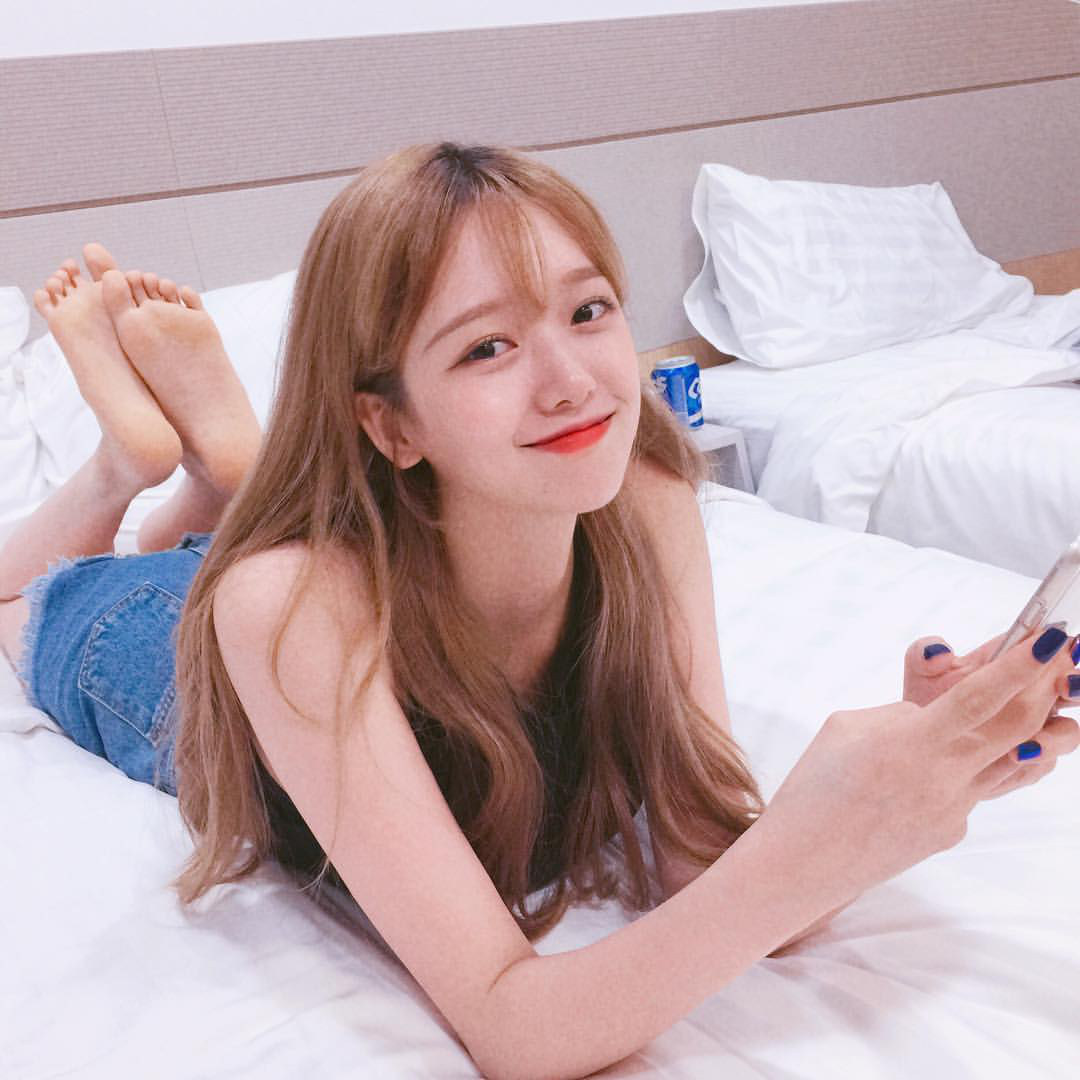

In [4]:
img00

In [5]:
from torchvision.datasets import ImageFolder
 
#加上transforms
#normalize=transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
#transform=transforms.Compose([
#    transforms.RandomCrop(180),
#    transforms.RandomHorizontalFlip(),
#    transforms.ToTensor(), #将图片转换为Tensor,归一化至[0,1]
#    normalize
#])
train_path = r'D:\桌面\pyTorch\data\persons\train'
test_path = r'D:\桌面\pyTorch\data\persons\test'
transform = transforms.Compose([
                        transforms.Resize((540, 540)),
                        transforms.ToTensor()
                        ])
train_dataset = ImageFolder(train_path, transform=transform)
test_dataset = ImageFolder(train_path, transform=transform)

In [6]:
train_dataset.imgs

[('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\20582676_111009189537511_7493147296339591168_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\22158811_177789826111214_6111591475542228992_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\22220620_334022377068351_1119918988789284864_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\23967188_331979667269260_9125438849701380096_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\25006091_1409935785801851_9007172673188397056_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\25039220_1763287603966617_7989420927622316032_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\27891097_1771065009584308_7498435693866123264_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\28765545_177536439553010_7556242951488143360_n.jpg',
  0),
 ('D:\\桌面\\pyTorch\\data\\persons\\train\\___solvely___\\29088446_107

In [7]:
batch_size = 8
train_iter = data.DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
test_iter = data.DataLoader(test_dataset, batch_size, shuffle=False, num_workers=0)

In [13]:
for X, y in train_iter:
    break

In [19]:
X.shape, y.shape
x = X

In [28]:
x = X
net = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5, padding=2),  nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(16, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(32, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Flatten(),
                nn.Linear(32*30*30, 2000), nn.ReLU(),
                nn.Linear(2000, 500), nn.ReLU(),
                nn.Linear(500, 200), nn.ReLU(),
                nn.Linear(200, 84), nn.ReLU(),
                nn.Linear(84, 3))
for layer in net:
    x = layer(x)
    print(x.shape)
print(x, x.shape)
print(y)

torch.Size([8, 6, 540, 540])
torch.Size([8, 6, 540, 540])
torch.Size([8, 6, 270, 270])
torch.Size([8, 16, 266, 266])
torch.Size([8, 16, 266, 266])
torch.Size([8, 16, 133, 133])
torch.Size([8, 32, 129, 129])
torch.Size([8, 32, 129, 129])
torch.Size([8, 32, 64, 64])
torch.Size([8, 32, 60, 60])
torch.Size([8, 32, 60, 60])
torch.Size([8, 32, 30, 30])
torch.Size([8, 28800])
torch.Size([8, 2000])
torch.Size([8, 2000])
torch.Size([8, 500])
torch.Size([8, 500])
torch.Size([8, 200])
torch.Size([8, 200])
torch.Size([8, 84])
torch.Size([8, 84])
torch.Size([8, 3])
tensor([[-0.0769,  0.0940, -0.0655],
        [-0.0774,  0.0937, -0.0650],
        [-0.0773,  0.0940, -0.0650],
        [-0.0776,  0.0941, -0.0653],
        [-0.0779,  0.0940, -0.0646],
        [-0.0773,  0.0944, -0.0650],
        [-0.0778,  0.0942, -0.0646],
        [-0.0777,  0.0943, -0.0645]], grad_fn=<AddmmBackward0>) torch.Size([8, 3])
tensor([1, 1, 1, 0, 1, 2, 1, 1])


In [29]:
net = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5, padding=2), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(16, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(32, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Flatten(),
                nn.Linear(32*30*30, 2000), nn.ReLU(),
                nn.Linear(2000, 500), nn.ReLU(),
                nn.Linear(500, 200), nn.ReLU(),
                nn.Linear(200, 84), nn.ReLU(),
                nn.Linear(84, 3)
)
#device = torch.device('cpu')
device = torch.device('cuda:0')
net.to(device)
#X = torch.rand(size=(1, 3, 540, 540), dtype=torch.float32)
#for layer in net:
#    X = layer(X)
#    print(layer.__class__.__name__,'output shape: \t',X.shape)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (7): ReLU()
  (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (9): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (10): ReLU()
  (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=28800, out_features=2000, bias=True)
  (14): ReLU()
  (15): Linear(in_features=2000, out_features=500, bias=True)
  (16): ReLU()
  (17): Linear(in_features=500, out_features=200, bias=True)
  (18): ReLU()
  (19): Linear(in_features=200, out_features=84, bias=True)
  (20): ReLU()
  (21): Linear(in_features=84, out_features=3, bias=True)
)

In [30]:
from d2l import torch as d2l
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.000, train acc 1.000, test acc 1.000
65.7 examples/sec on cuda:0


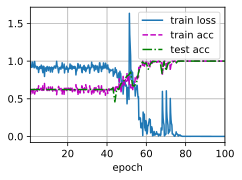

In [31]:
lr, num_epochs = 0.05, 100
train_ch6(net, train_iter, test_iter, num_epochs, lr, device)

In [32]:
for X, y in test_iter:
    break
X, y = X.to(device), y.to(device)

In [33]:
y_hat = net(X)

In [34]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [35]:
y_hat

tensor([[ 10.0282,  -1.1657,  -7.5393],
        [ 15.1915,  -0.2643, -12.6634],
        [ 10.3410,  -0.7224,  -8.7477],
        [ 32.5503,  -4.8787, -26.9687],
        [ 17.2671,  -1.6514, -14.1016],
        [ 22.7702,  -2.0022, -17.6112],
        [ 20.1969,  -2.6071, -15.4079],
        [ 17.7877,   0.6683, -15.7703]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [36]:
torch.save(net.state_dict(), 'cnn_classification_people.params')

In [37]:
clone = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=5, padding=2), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(16, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Conv2d(32, 32, kernel_size=5), nn.ReLU(),
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Flatten(),
                nn.Linear(32*30*30, 2000), nn.ReLU(),
                nn.Linear(2000, 500), nn.ReLU(),
                nn.Linear(500, 200), nn.ReLU(),
                nn.Linear(200, 84), nn.ReLU(),
                nn.Linear(84, 3)
                    )
clone.load_state_dict(torch.load('cnn_classification_people.params'))
clone.eval()

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (7): ReLU()
  (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (9): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (10): ReLU()
  (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=28800, out_features=2000, bias=True)
  (14): ReLU()
  (15): Linear(in_features=2000, out_features=500, bias=True)
  (16): ReLU()
  (17): Linear(in_features=500, out_features=200, bias=True)
  (18): ReLU()
  (19): Linear(in_features=200, out_features=84, bias=True)
  (20): ReLU()
  (21): Linear(in_features=84, out_features=3, bias=True)
)

In [38]:
for X, y in test_iter:
    break
y_hat = clone(X)
y_hat

tensor([[ 10.0282,  -1.1657,  -7.5393],
        [ 15.1915,  -0.2643, -12.6634],
        [ 10.3410,  -0.7224,  -8.7477],
        [ 32.5503,  -4.8787, -26.9687],
        [ 17.2671,  -1.6514, -14.1016],
        [ 22.7702,  -2.0022, -17.6112],
        [ 20.1969,  -2.6071, -15.4079],
        [ 17.7877,   0.6683, -15.7703]], grad_fn=<AddmmBackward0>)

In [23]:
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([8, 6, 540, 540])
ReLU output shape: 	 torch.Size([8, 6, 540, 540])
AvgPool2d output shape: 	 torch.Size([8, 6, 270, 270])
Conv2d output shape: 	 torch.Size([8, 16, 266, 266])
ReLU output shape: 	 torch.Size([8, 16, 266, 266])
AvgPool2d output shape: 	 torch.Size([8, 16, 133, 133])
Conv2d output shape: 	 torch.Size([8, 32, 129, 129])
ReLU output shape: 	 torch.Size([8, 32, 129, 129])
AvgPool2d output shape: 	 torch.Size([8, 32, 64, 64])
Conv2d output shape: 	 torch.Size([8, 32, 60, 60])
ReLU output shape: 	 torch.Size([8, 32, 60, 60])
AvgPool2d output shape: 	 torch.Size([8, 32, 30, 30])
Flatten output shape: 	 torch.Size([8, 28800])
Linear output shape: 	 torch.Size([8, 2000])
ReLU output shape: 	 torch.Size([8, 2000])
Linear output shape: 	 torch.Size([8, 500])
ReLU output shape: 	 torch.Size([8, 500])
Linear output shape: 	 torch.Size([8, 200])
ReLU output shape: 	 torch.Size([8, 200])
Linear output shape: 	 torch.Size([8, 84])
ReLU output shape: 	 

In [24]:
X

tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]], device='cuda:0', grad_fn=<AddmmBackward0>)